In [73]:
import sklearn
import matplotlib.pyplot as plt
import pandas
from sklearn.cross_validation import train_test_split
import numpy
import plotly

In [74]:
sms = pandas.read_csv("spam.csv")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
sms=sms[['v1','v2']]
sms.columns=['isSpam','text']

In [76]:
def transformSpamColumn(x):
    if x=='ham':
        return 0
    return 1

In [77]:
sms['isSpam']=sms['isSpam'].apply(transformSpamColumn)

In [78]:
sms.head()

,isSpam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
spam_distribution=sms['isSpam'].value_counts()
spam_distribution

0    4825
1     747
Name: isSpam, dtype: int64

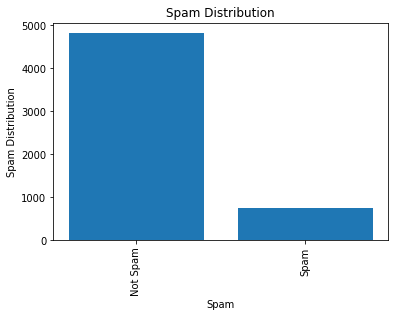

In [80]:
Index = [1,2]
plt.bar(Index, spam_distribution)
plt.xticks(Index, ['Not Spam','Spam'],rotation=90)
plt.ylabel('Spam Distribution')
plt.xlabel('Spam')
plt.title('Spam Distribution')
plt.show()

## Word Cloud for the SMS

In [81]:
from wordcloud import WordCloud,STOPWORDS
import re
from nltk.corpus import stopwords

In [82]:
def cleanedWords(raw_sentence):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_sentence)
    words = letters_only.lower().split()                            
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words
                       if w not in stops]
    return meaningful_words

In [83]:
def getWordCloud(df, isSpam):
    df=df[df['isSpam'] == isSpam]
    words = ' '.join(df['text'])
    cleaned_word = " ".join(cleanedWords(words))
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     )
    wordcloud.generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

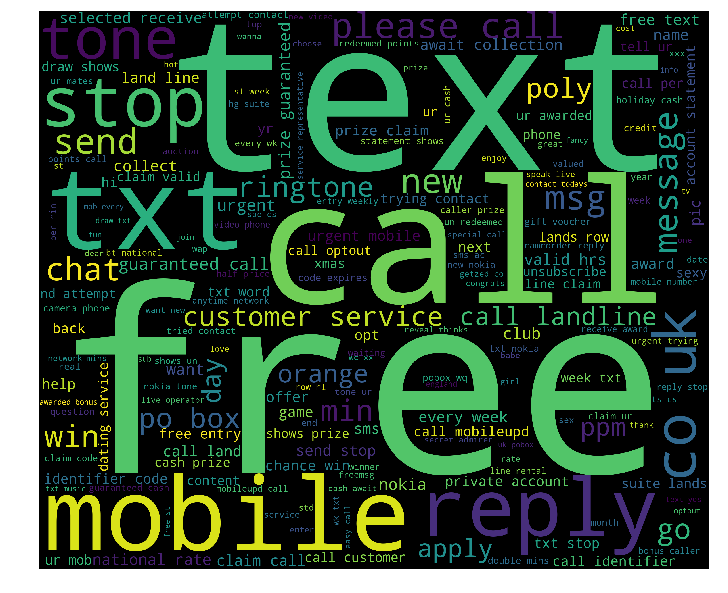

In [84]:
getWordCloud(sms,1)

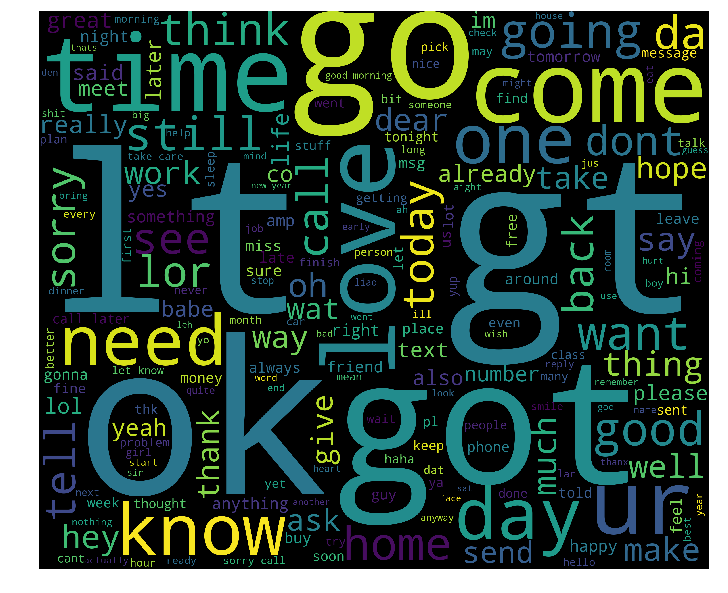

In [85]:
getWordCloud(sms,0)

## Data cleaning 

In [86]:
import nltk

In [87]:
def sms_to_words(raw_sms):
    return( " ".join( cleanedWords(raw_sms) ))

In [88]:
sms['clean_text']=sms['text'].apply(lambda x: sms_to_words(x))

In [89]:
sms.head()

,isSpam,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [90]:
train,test = train_test_split(sms,test_size=0.2,random_state=42)

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train['clean_text'].values)
test_features=v.transform(test['clean_text'].values)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [104]:
Classifiers = [
    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
    KNeighborsClassifier(4),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=250),
    AdaBoostClassifier(),
    GaussianNB()]

In [105]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['isSpam'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['isSpam'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['isSpam'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.975784753363
Accuracy of KNeighborsClassifier is 0.919282511211
Accuracy of SVC is 0.865470852018
Accuracy of DecisionTreeClassifier is 0.968609865471
Accuracy of RandomForestClassifier is 0.974887892377
Accuracy of AdaBoostClassifier is 0.97399103139
Accuracy of GaussianNB is 0.87802690583


## Compare the model performances

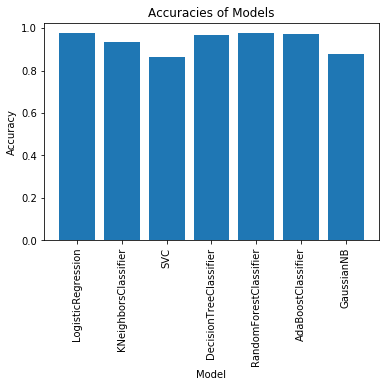

In [71]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index, Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()